# Customer Segmentation Using KMeans

# Importing necessary libraries

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load data

In [97]:
data = pd.read_csv(r"C:\Users\manan\Downloads\Mall_Customers.csv")

In [98]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [99]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [100]:
data.shape

(200, 5)

In [101]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [102]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [103]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# visualization

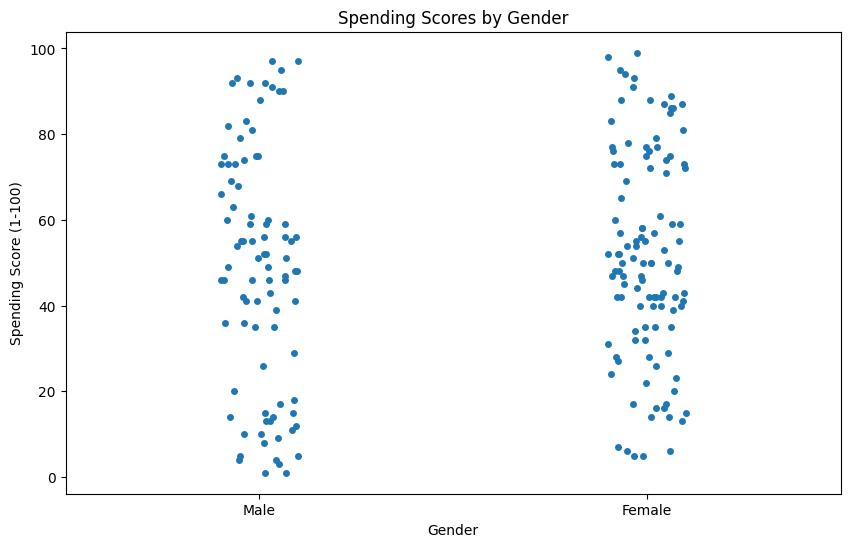

In [105]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='Gender', y='Spending Score (1-100)', data=data, jitter=True)
plt.title('Spending Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.show()

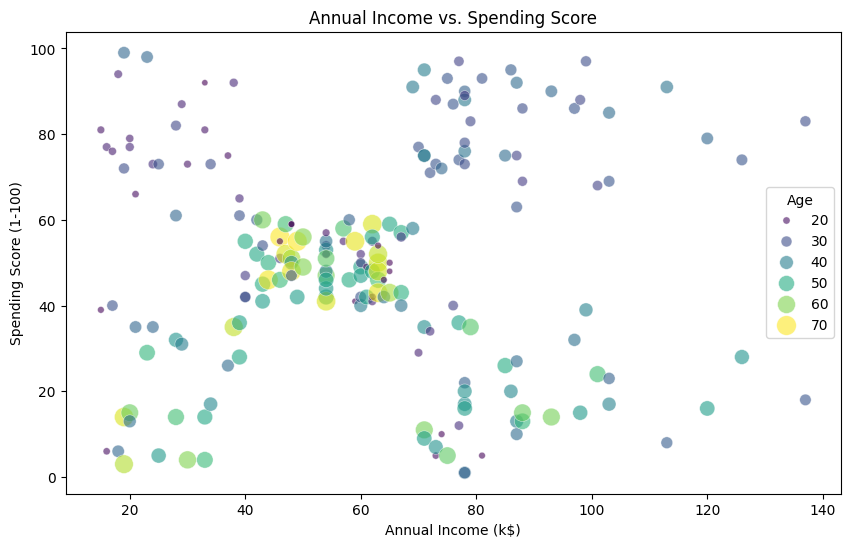

In [106]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Age', data=data, palette='viridis', size='Age', sizes=(20, 200), alpha=0.6, edgecolor='w')
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Age')
plt.show()

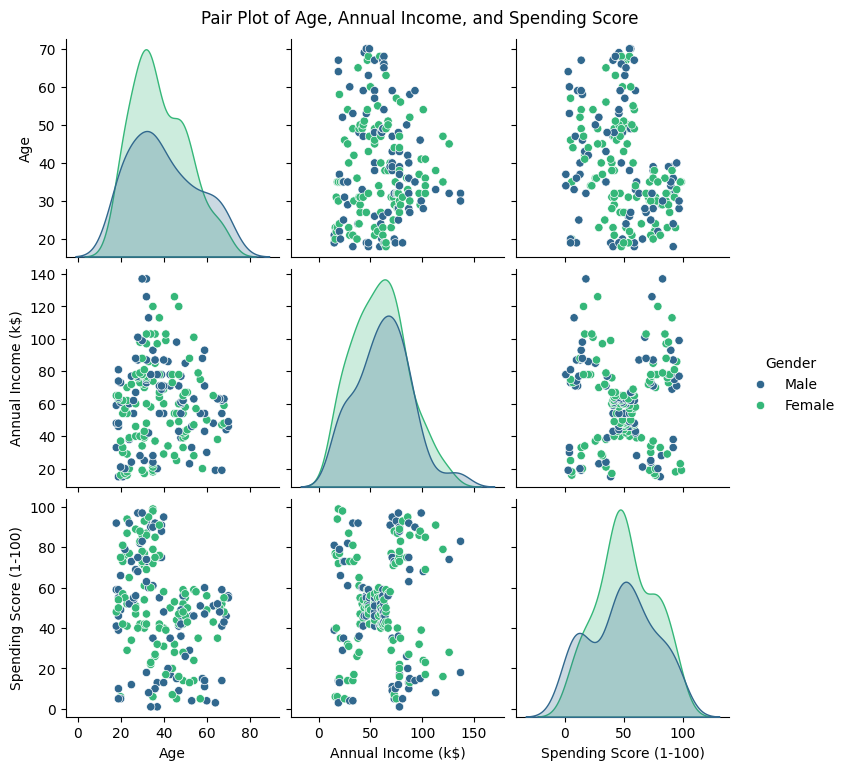

In [107]:
sns.pairplot(data, hue='Gender', vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], palette='viridis')
plt.suptitle('Pair Plot of Age, Annual Income, and Spending Score', y=1.02)
plt.show()

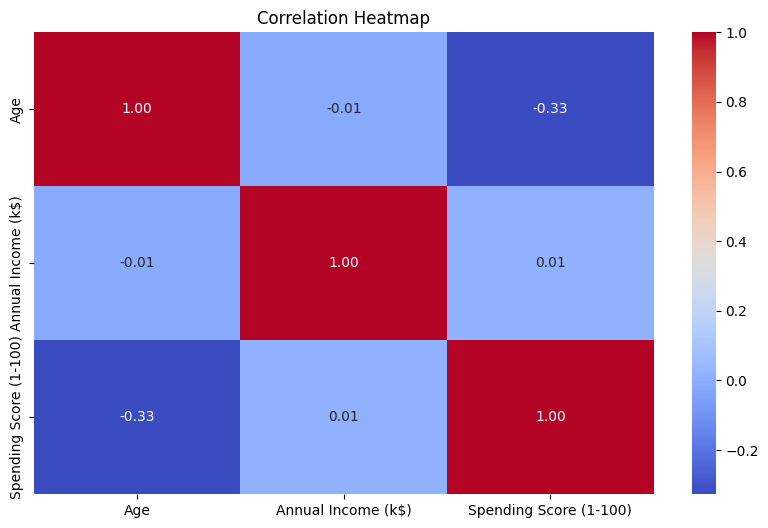

In [108]:
plt.figure(figsize=(10, 6))
corr = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Select the features

In [110]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data

In [112]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering

In [114]:
kmeans = KMeans(n_clusters=5, random_state=42)  
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataset

In [116]:
data['Cluster'] = clusters

# Visualize the clusters

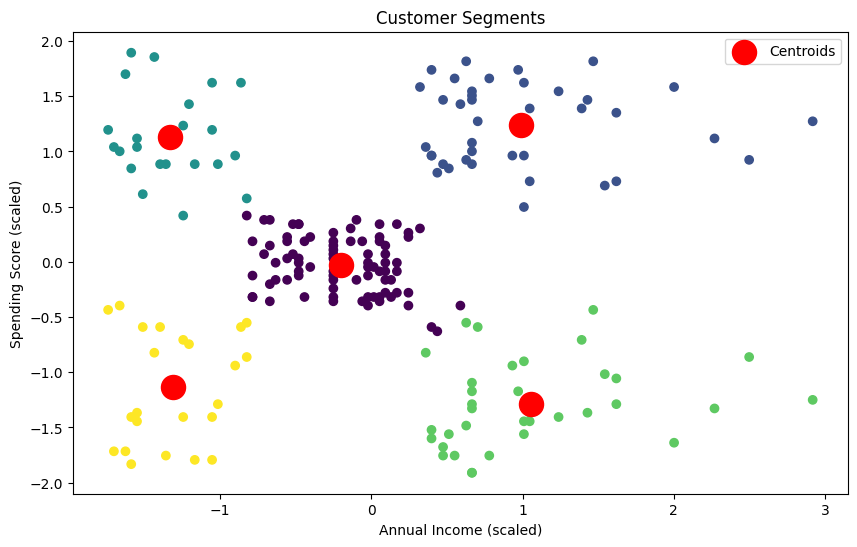

In [118]:
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Customer Segments')
plt.legend()
plt.show()